# NBaIoT SOM+Algos CLASSIFY

## Device 6

- Training on device 6 (using both Mirai and Gafgyt).
- Testing on device 6 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 19:45:32.512272: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 6

In [8]:
train_index

6

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((98514, 115), (98514,)),
 ((309040, 115), (309040,)),
 ((429337, 115), (429337,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((68959, 115), (29555, 115), (68959,), (29555,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((216328, 115), (92712, 115), (216328,), (92712,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((300535, 115), (128802, 115), (300535,), (128802,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

68959


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(68959, 115) (68959,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(137918, 115) (137918,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(68959, 115) (68959,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(137918, 115) (137918,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(122267, 115) (122267,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((29555, 115), (92712, 115), (29555,), (92712,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(158357, 115) (158357,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(110849, 115) (110849,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(137918, 115) (137918,)
------------Scale data-----------------
(137918, 115) (137918,)
X_train_scaled
[[ 6.58495870e-03  8.26417879e-02  1.57259353e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.84111666e-03  1.31751364e-01  7.19346696e-02 ...  4.73810971e-18
   0.00000000e+00  0.00000000e+00]
 [ 9.85589724e-03  1.00520871e-01  5.55097169e-18 ...  1.90671423e-04
  -1.78493986e-06 -2.39983277e-02]
 ...
 [ 6.57051763e-03  1.00520871e-01  0.00000000e+00 ...  1.89971962e-04
  -1.74372935e-06 -2.35207208e-02]
 [ 3.71307177e-02  1.41258531e-01  5.23303067e-02 ...  1.24342339e-01
   1.34095350e-01  3.08147475e-01]
 [ 1.85462229e-01  1.88592381e-01  1.09557469e-01 ...  3.33963680e-05
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(137918, 115) (137918,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



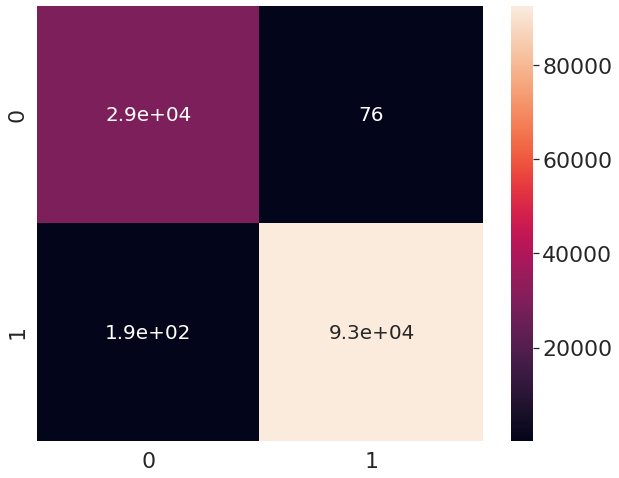

AUC score:  0.9977057621071465


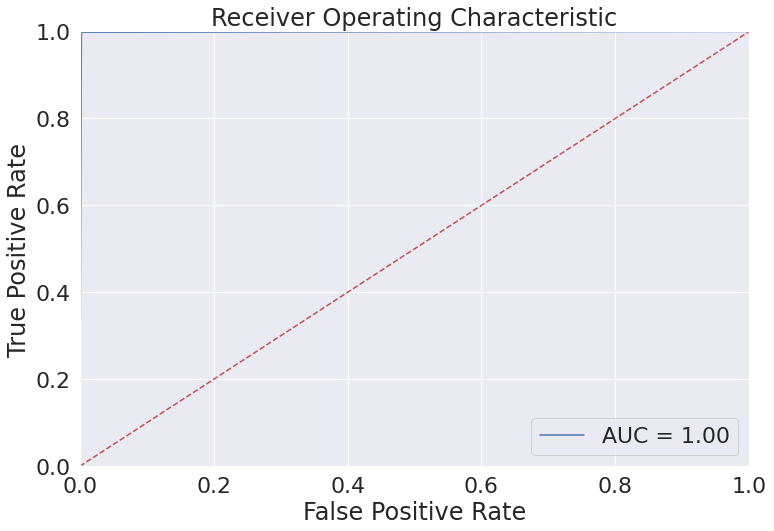

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.997     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



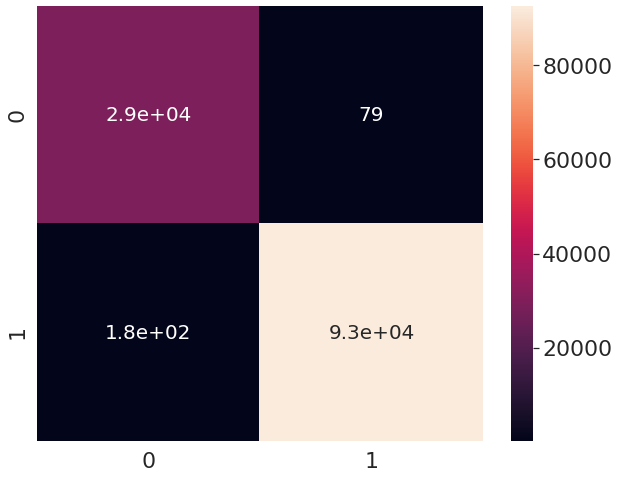

AUC score:  0.9976819744990916


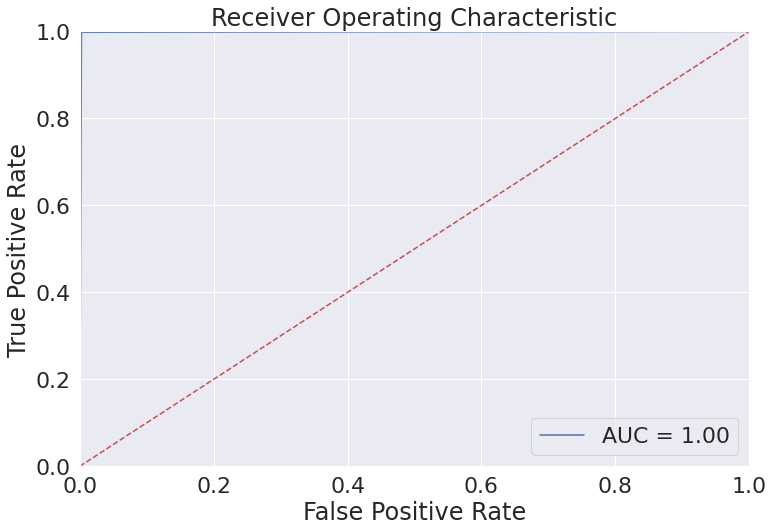

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



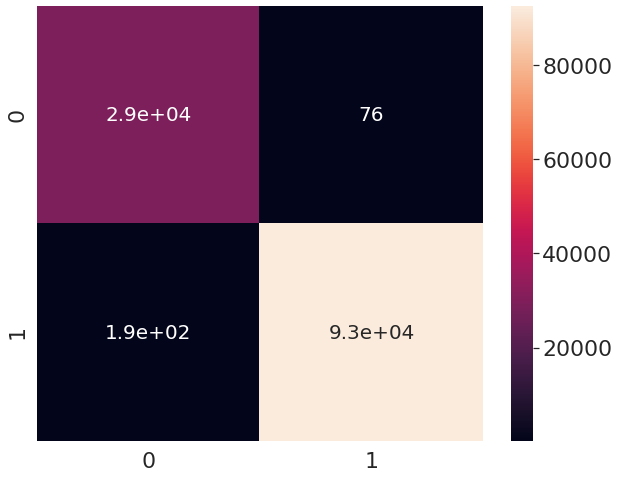

AUC score:  0.9977057621071465


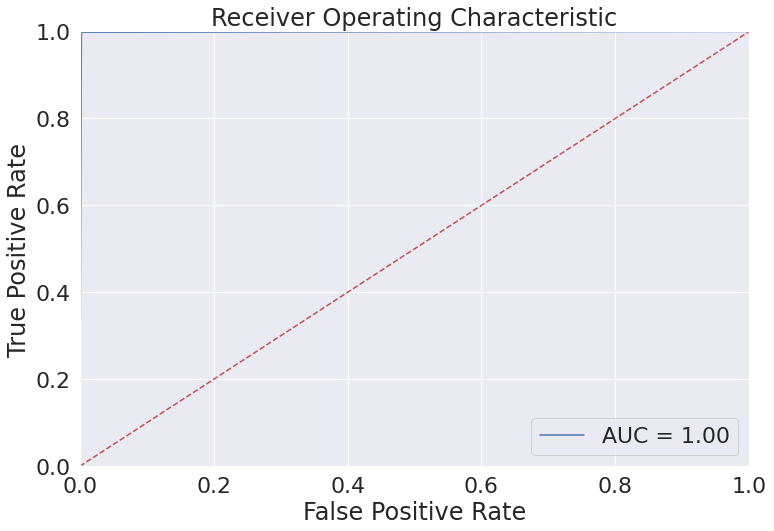

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



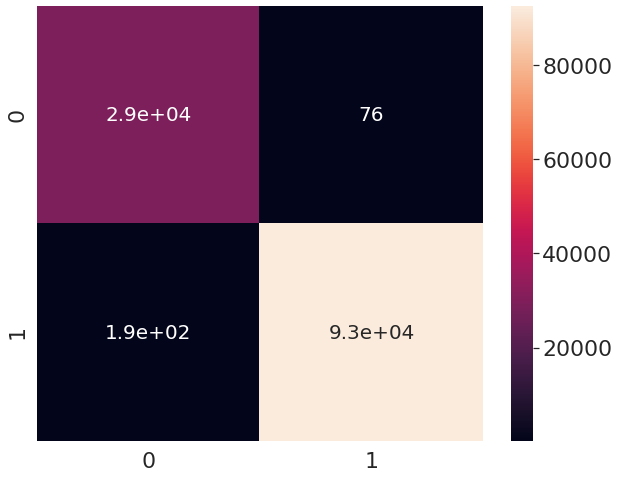

AUC score:  0.9977057621071465


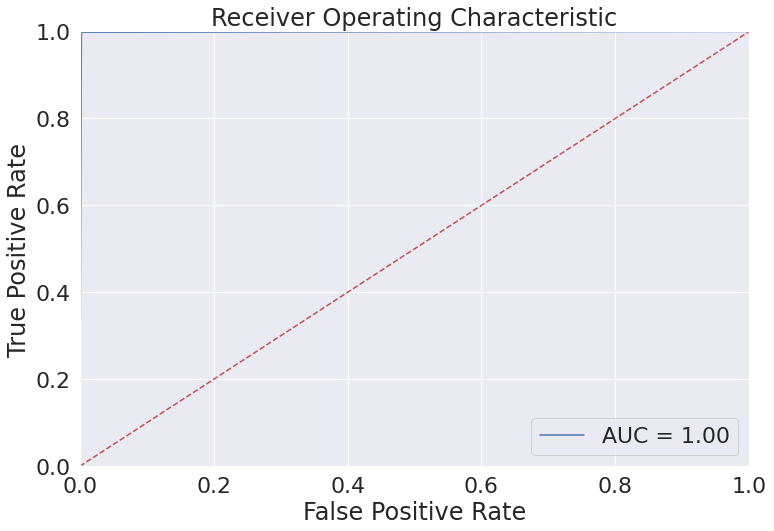

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



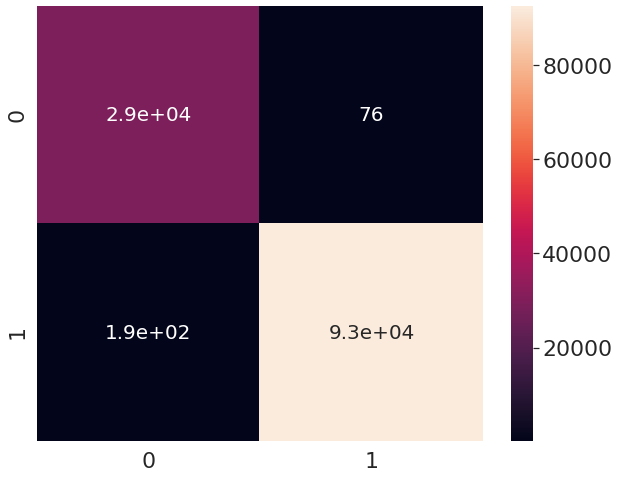

AUC score:  0.9977057621071465


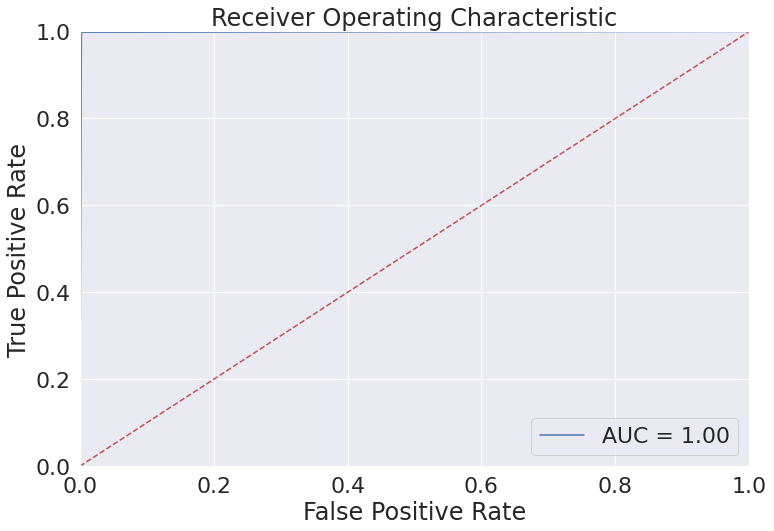

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



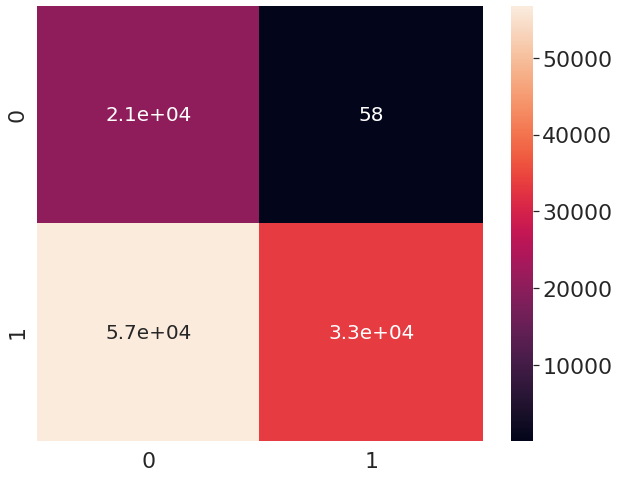

AUC score:  0.6842360070660859


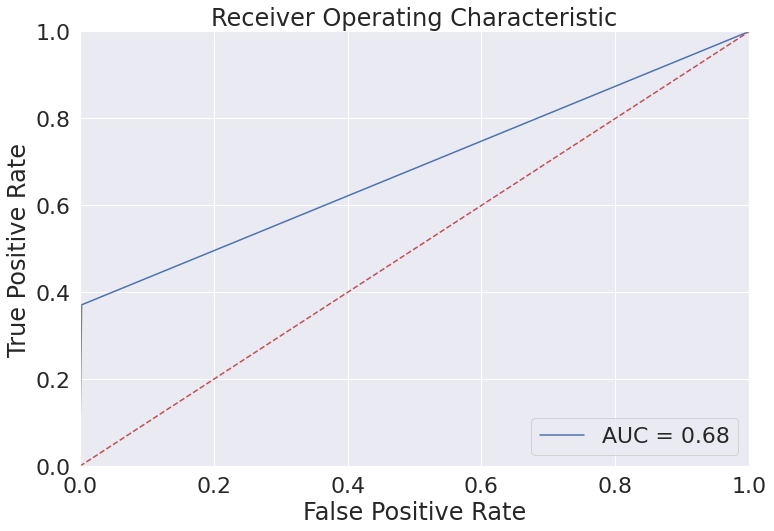

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.421     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



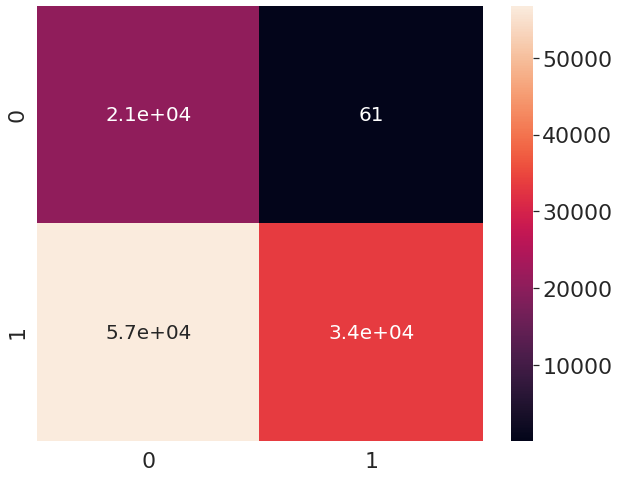

AUC score:  0.6842354436723422


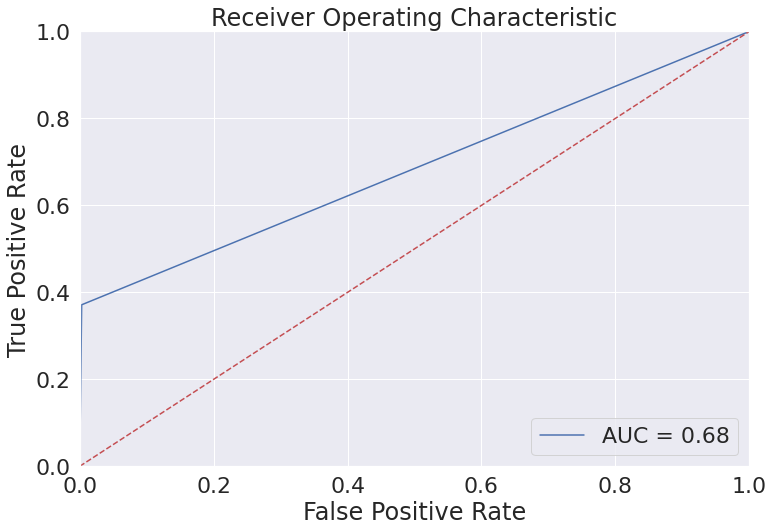

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



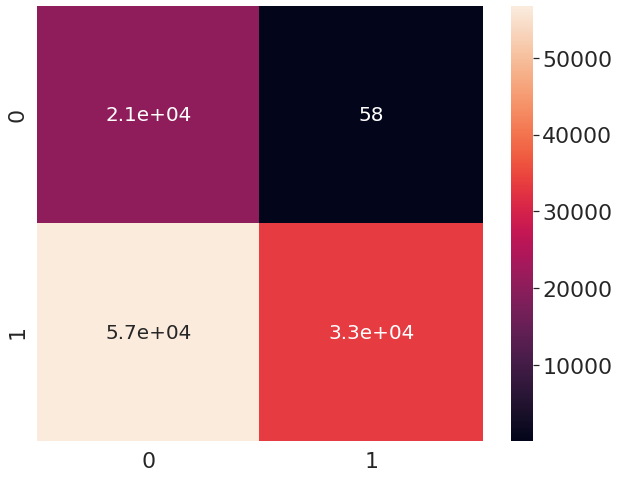

AUC score:  0.6842360070660859


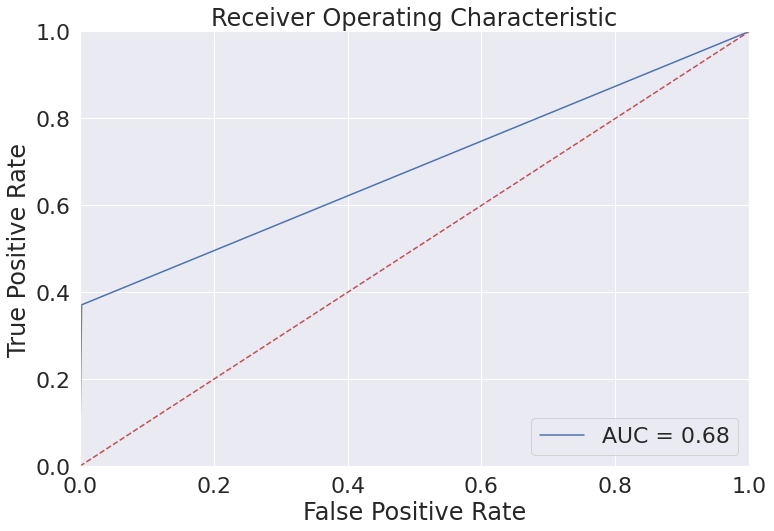

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



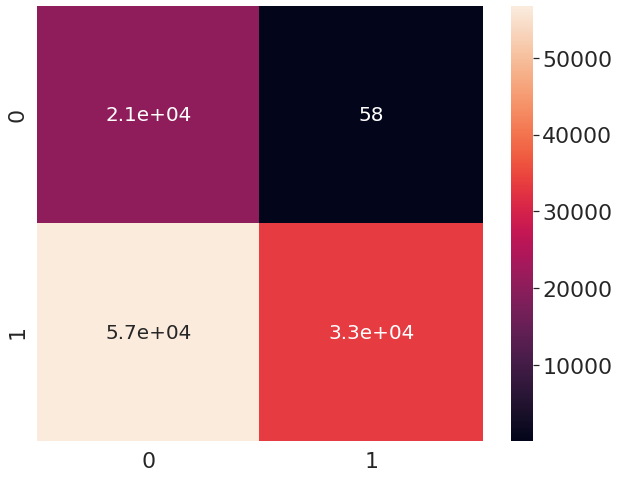

AUC score:  0.6842360070660859


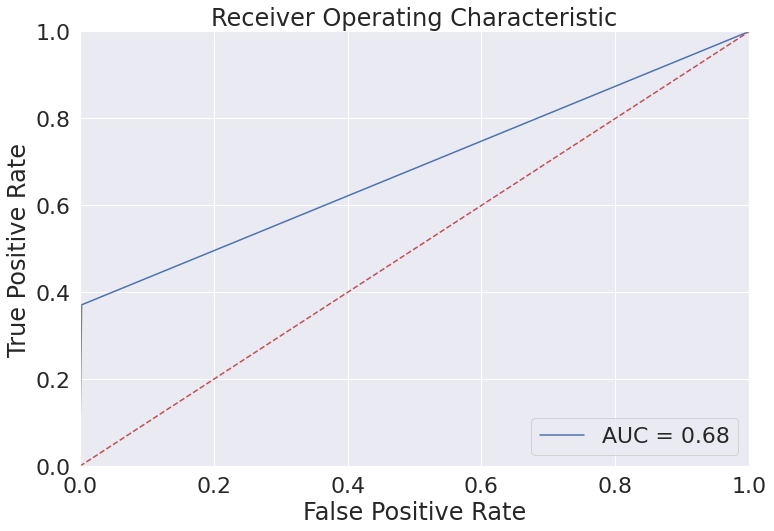

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



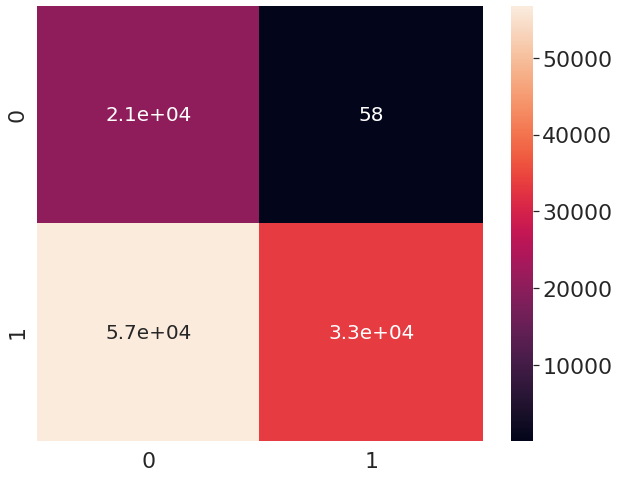

AUC score:  0.6842360070660859


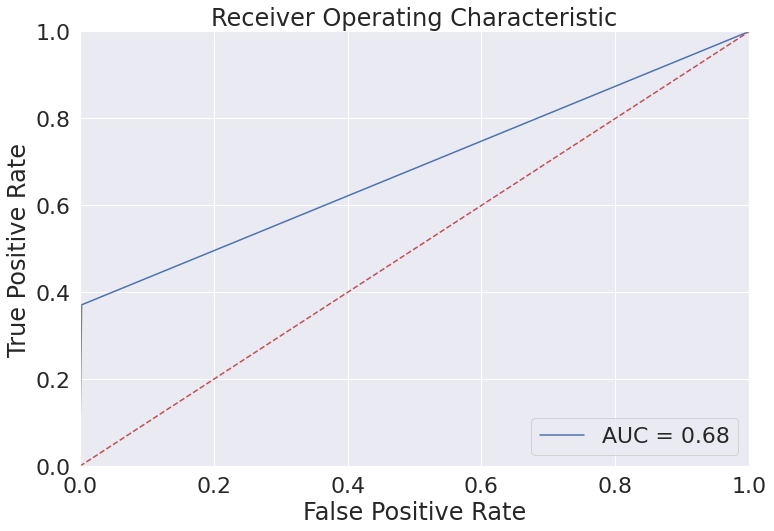

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(137918, 115) (137918,)
------------Scale data-----------------
(137918, 115) (137918,)
X_train_scaled
[[ 5.28964307e-03  8.26417879e-02  1.57259353e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.49541264e-03  1.31751364e-01  7.19346696e-02 ...  5.41857340e-18
   0.00000000e+00  0.00000000e+00]
 [ 7.91716105e-03  1.00520871e-01  5.55097169e-18 ...  2.18054702e-04
  -2.59086333e-06 -3.21075415e-02]
 ...
 [ 5.27804267e-03  1.00520871e-01  0.00000000e+00 ...  2.17254788e-04
  -2.53104574e-06 -3.14685477e-02]
 [ 2.98267996e-02  1.41258531e-01  5.23303067e-02 ...  1.42199765e-01
   1.94641138e-01  4.12272803e-01]
 [ 1.48980281e-01  1.88592381e-01  1.09557469e-01 ...  3.81925879e-05
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(137918, 115) (137918,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



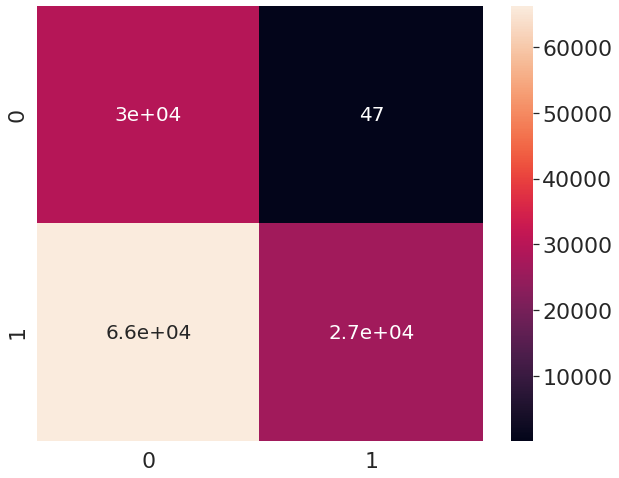

AUC score:  0.6423902204470288


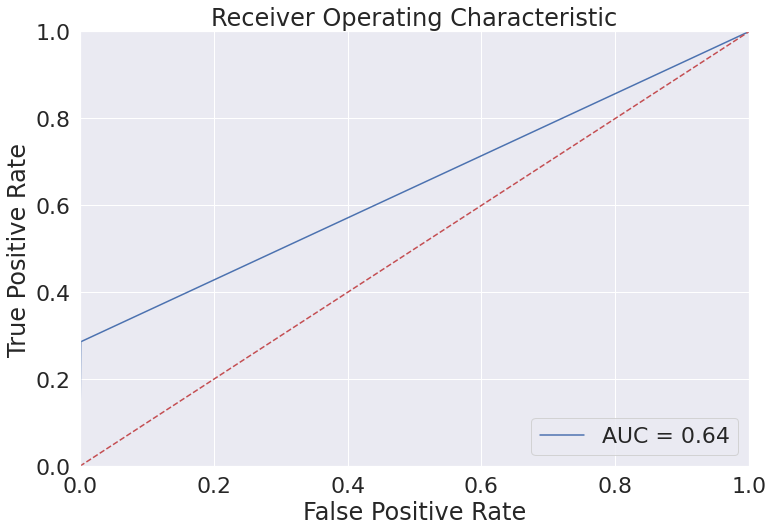

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



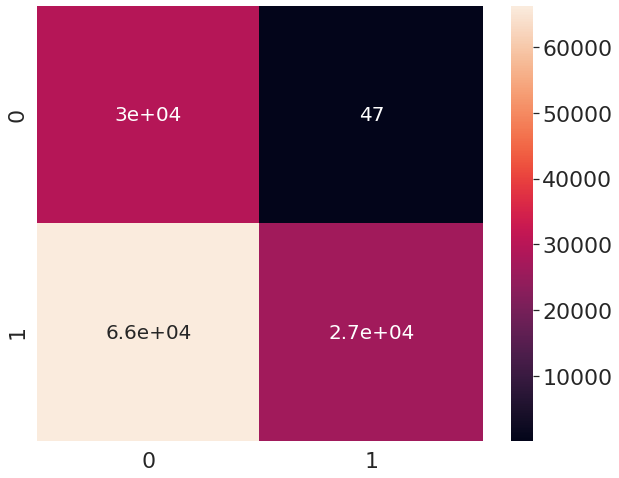

AUC score:  0.6423902204470288


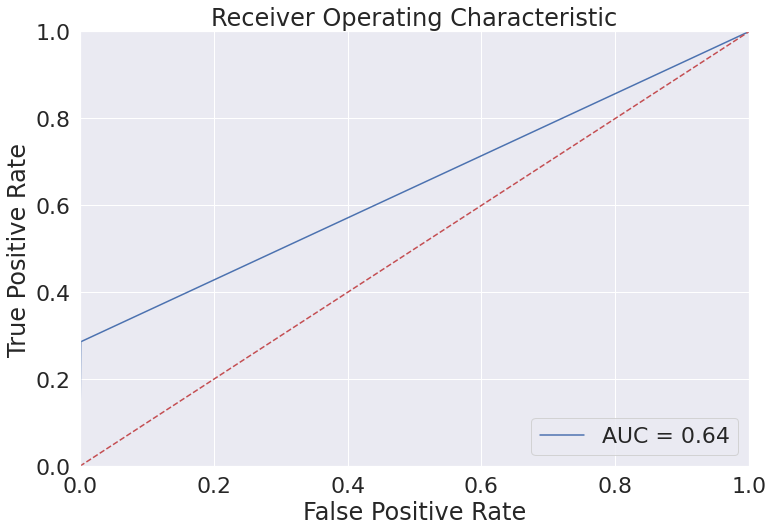

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



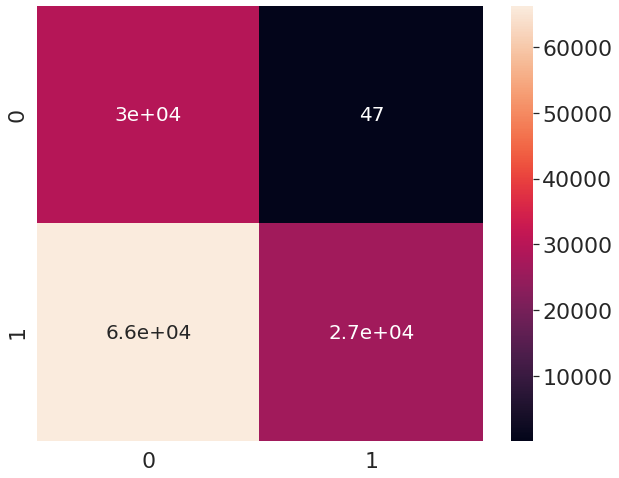

AUC score:  0.6423902204470288


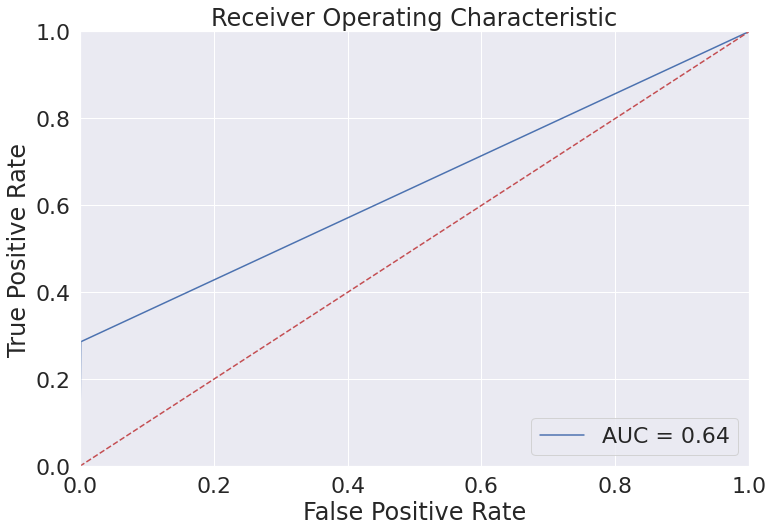

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



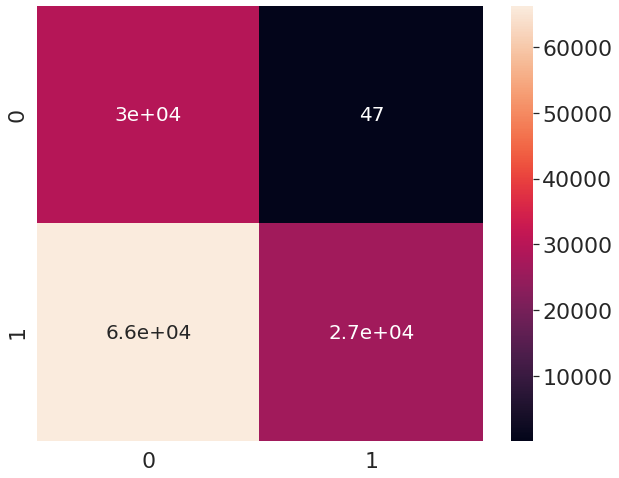

AUC score:  0.6423902204470288


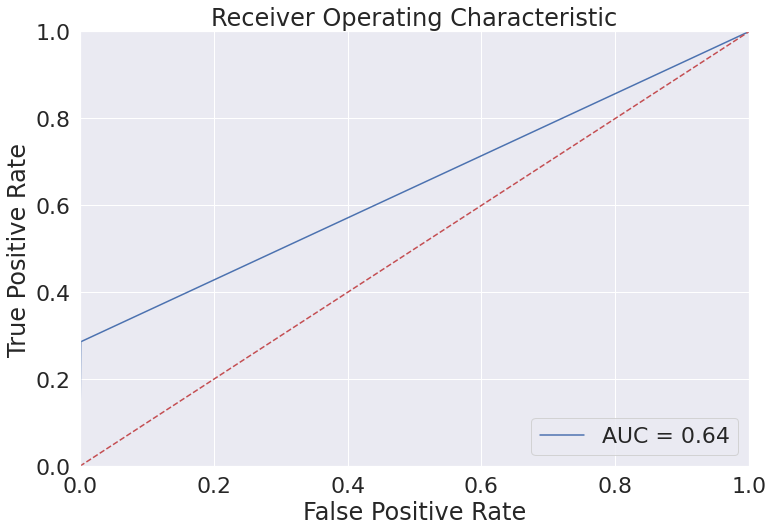

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



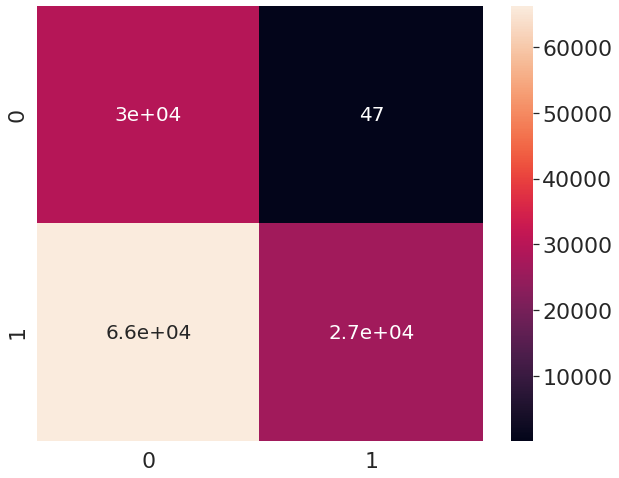

AUC score:  0.6423902204470288


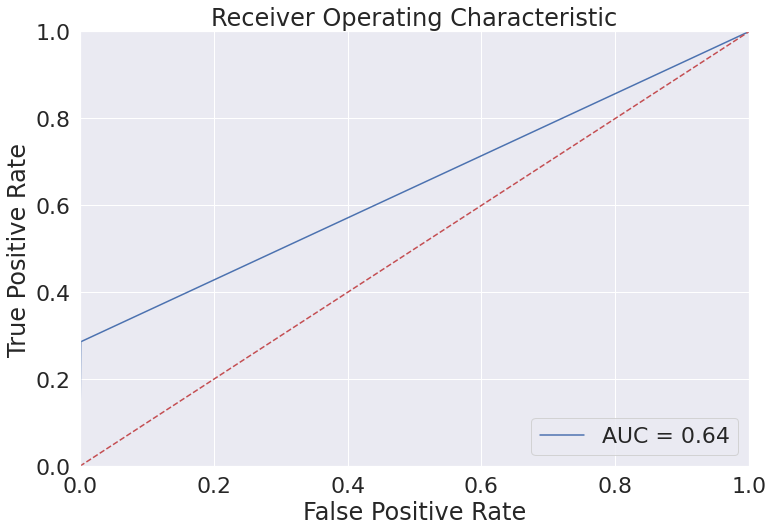

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



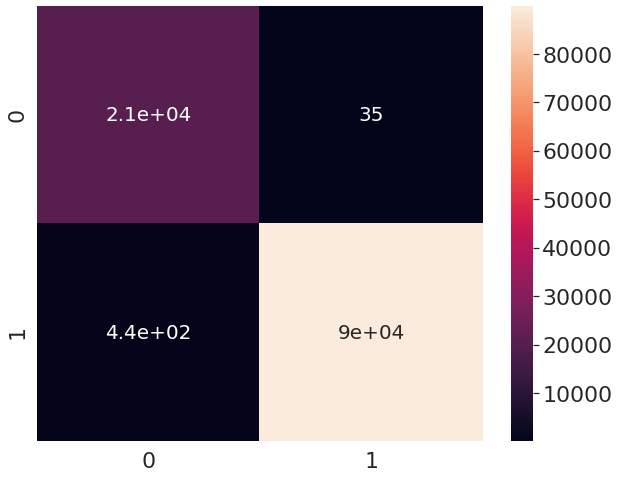

AUC score:  0.9967357068488861


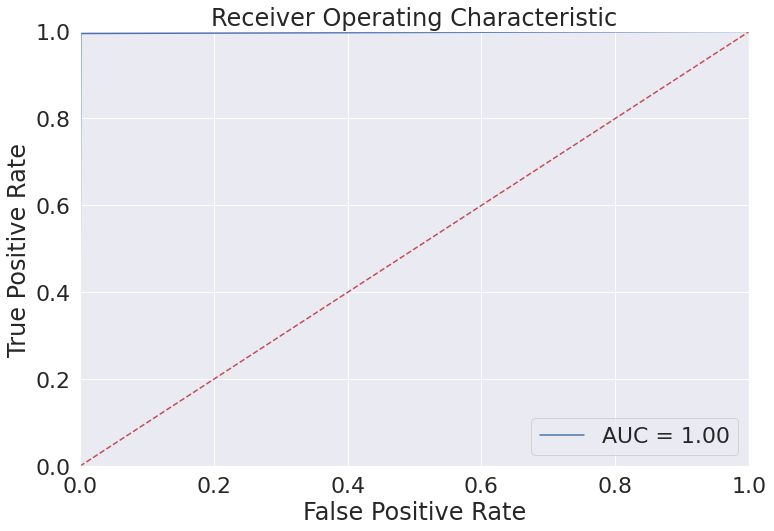

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.980     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.990     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



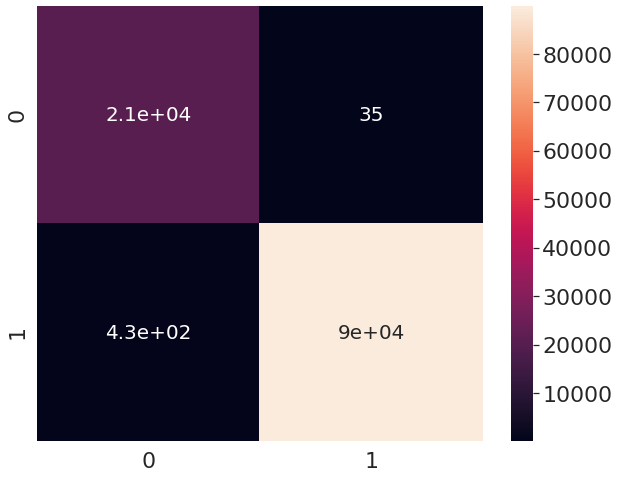

AUC score:  0.9967634242642925


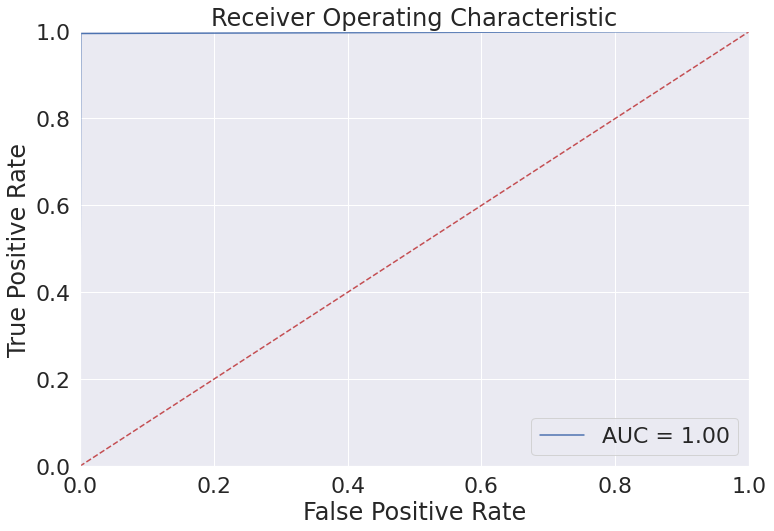

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



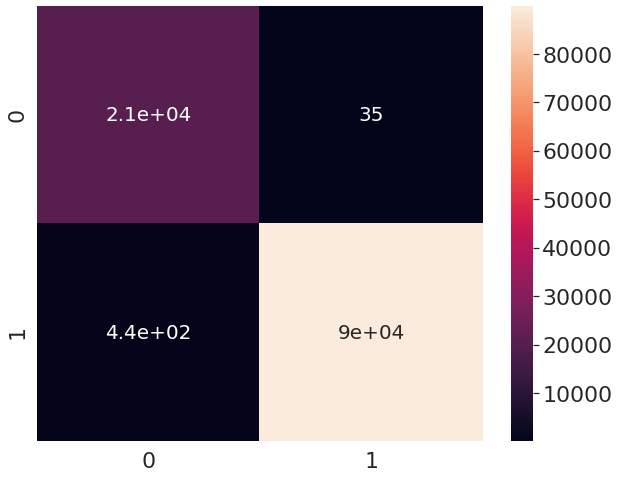

AUC score:  0.9967357068488861


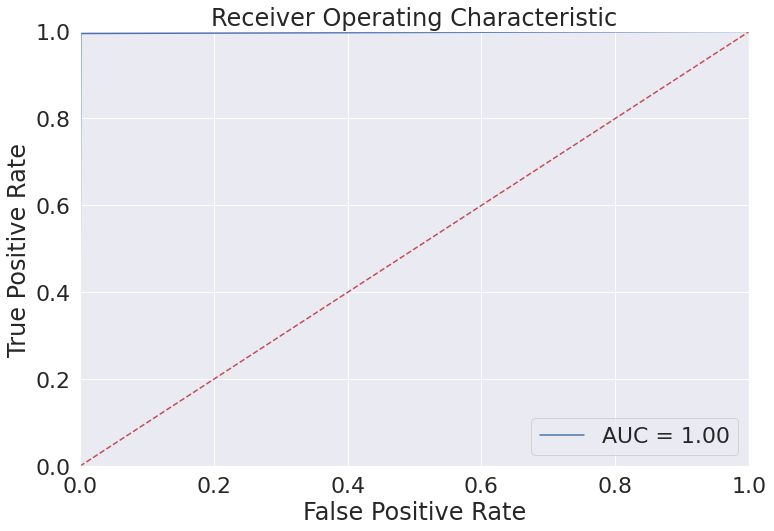

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



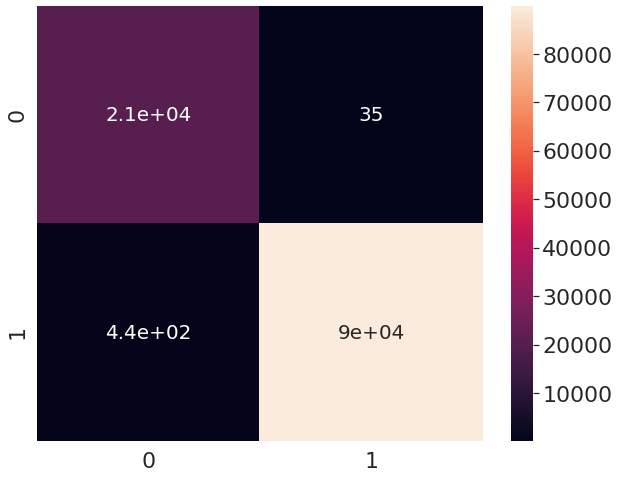

AUC score:  0.9967357068488861


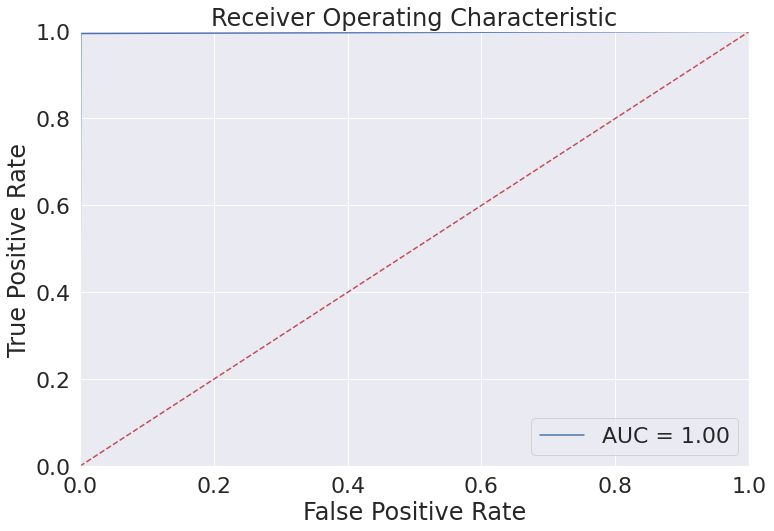

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



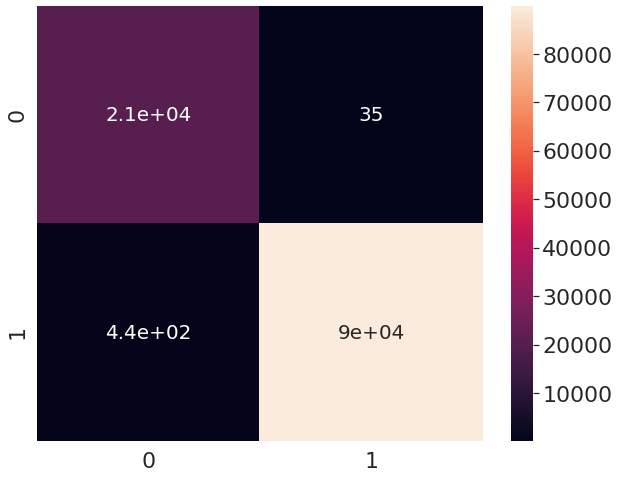

AUC score:  0.9967357068488861


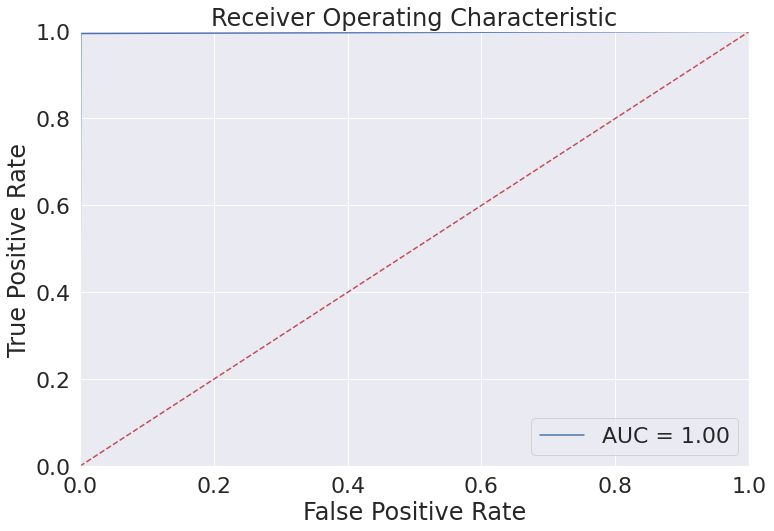

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [30]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((137918, 115), (137918, 115), (122267, 115), (110849, 115))

In [31]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [32]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((137918,), (137918,), (122267,), (110849,))

In [33]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [34]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [35]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.988     0.999     0.993     29555
           1      1.000     0.996     0.998     92712

    accuracy                          0.997    122267
   macro avg      0.994     0.998     0.996    122267
weighted avg      0.997     0.997     0.997    122267



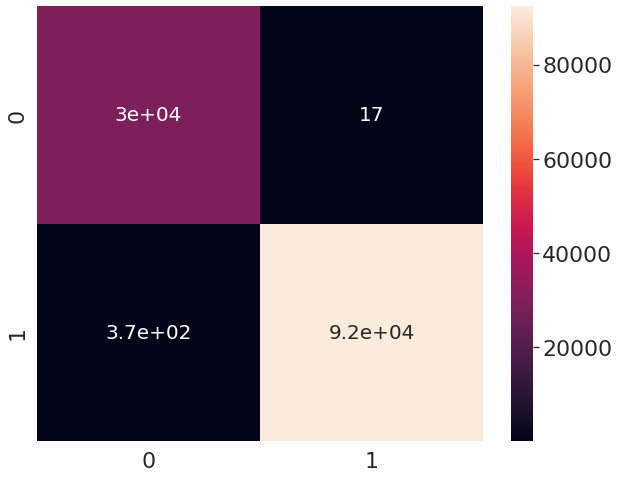

AUC score:  0.9977007947759163


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


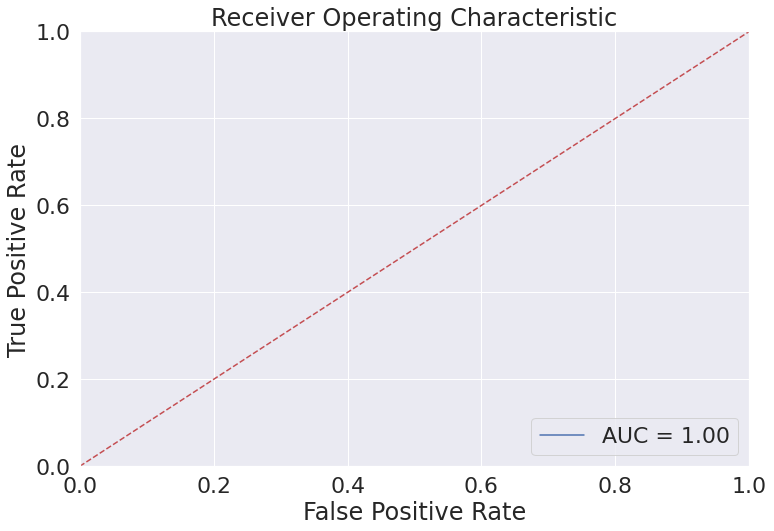

In [36]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.358     0.999     0.527     20653
           1      1.000     0.590     0.742     90196

    accuracy                          0.666    110849
   macro avg      0.679     0.795     0.635    110849
weighted avg      0.880     0.666     0.702    110849



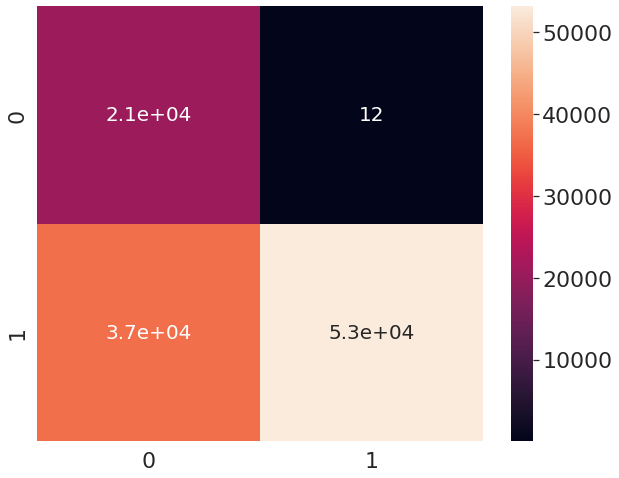

AUC score:  0.7945618069155128


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


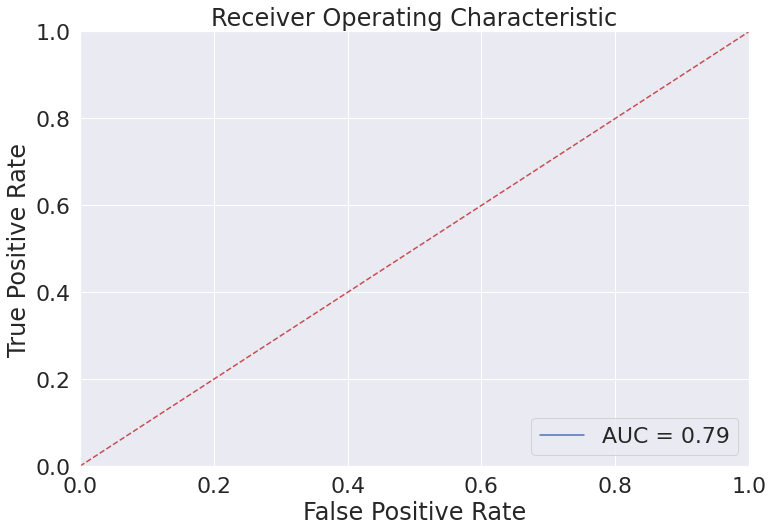

In [37]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [38]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.304     0.989     0.466     29555
           1      0.987     0.280     0.436     92712

    accuracy                          0.451    122267
   macro avg      0.646     0.634     0.451    122267
weighted avg      0.822     0.451     0.443    122267



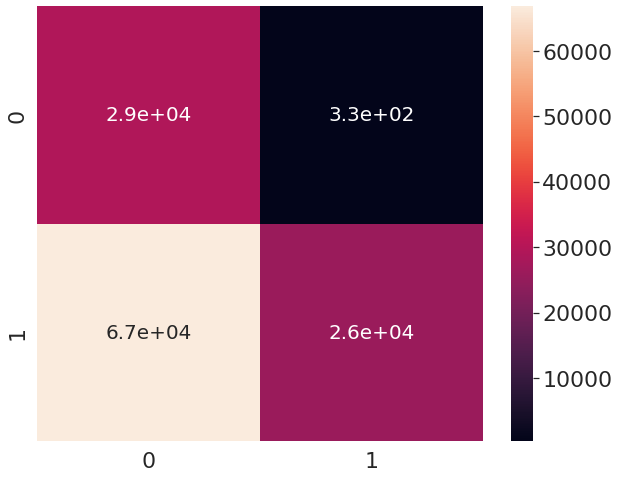

AUC score:  0.6342735506717199


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


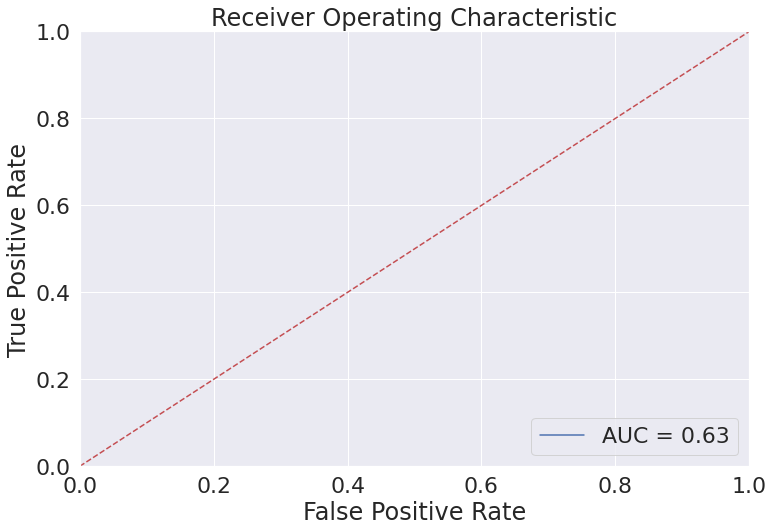

In [39]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.926     0.988     0.956     20653
           1      0.997     0.982     0.990     90196

    accuracy                          0.983    110849
   macro avg      0.962     0.985     0.973    110849
weighted avg      0.984     0.983     0.983    110849



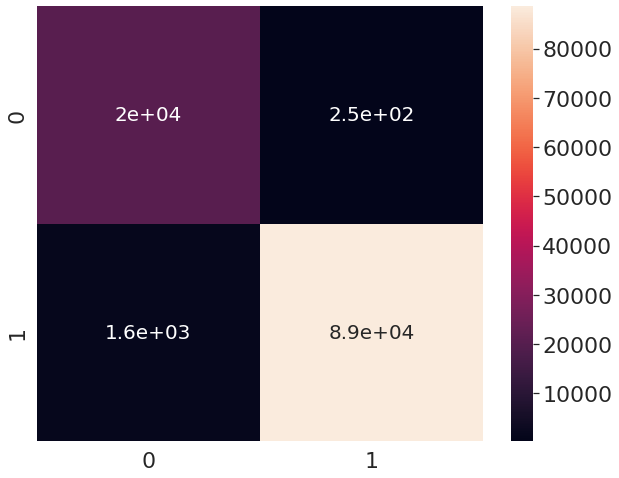

AUC score:  0.9849913774828761


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


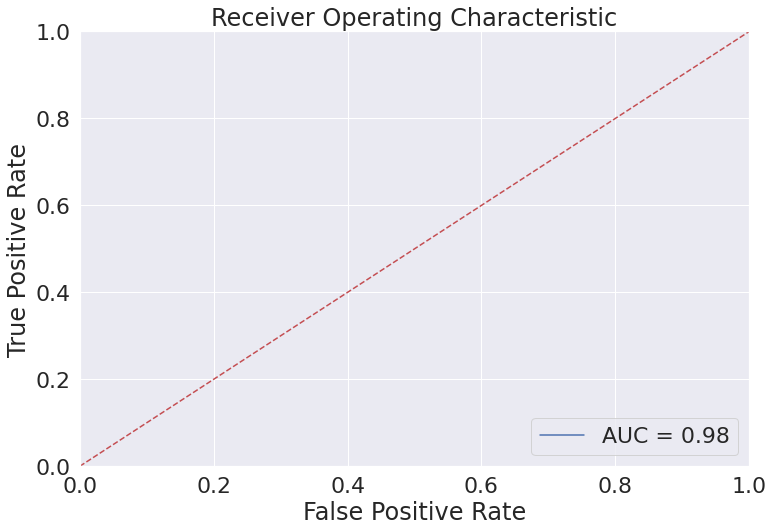

In [40]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [41]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.253     1.000     0.404     29555
           1      0.999     0.060     0.112     92712

    accuracy                          0.287    122267
   macro avg      0.626     0.530     0.258    122267
weighted avg      0.819     0.287     0.183    122267



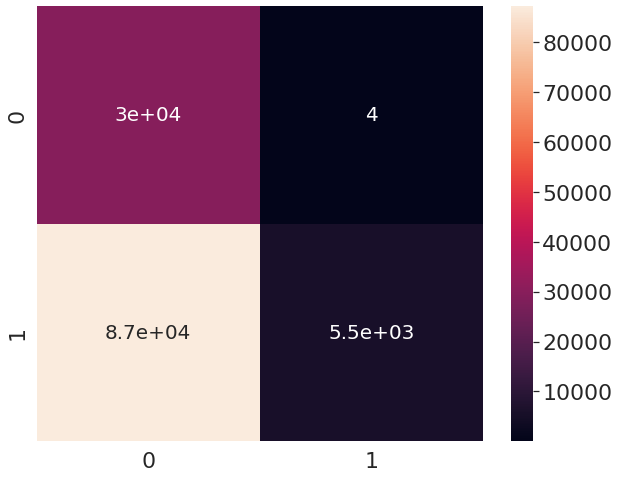

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


AUC score:  0.5297289038928009


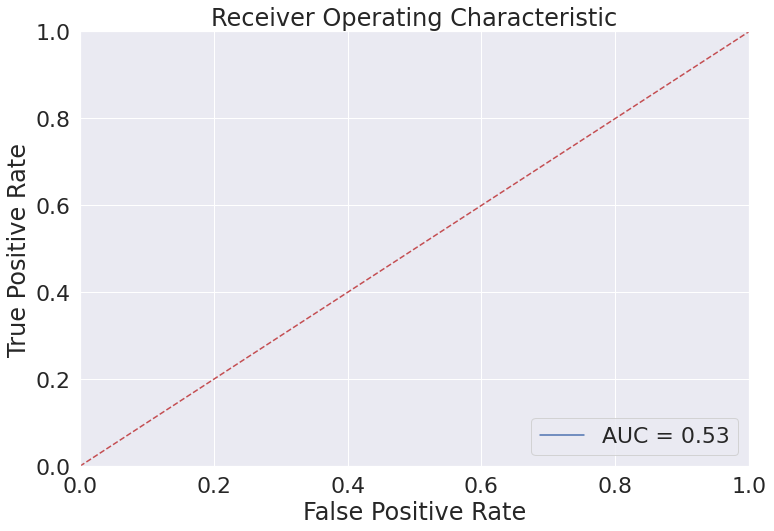

In [42]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.186     1.000     0.314     20653
           1      0.667     0.000     0.000     90196

    accuracy                          0.186    110849
   macro avg      0.426     0.500     0.157    110849
weighted avg      0.577     0.186     0.059    110849



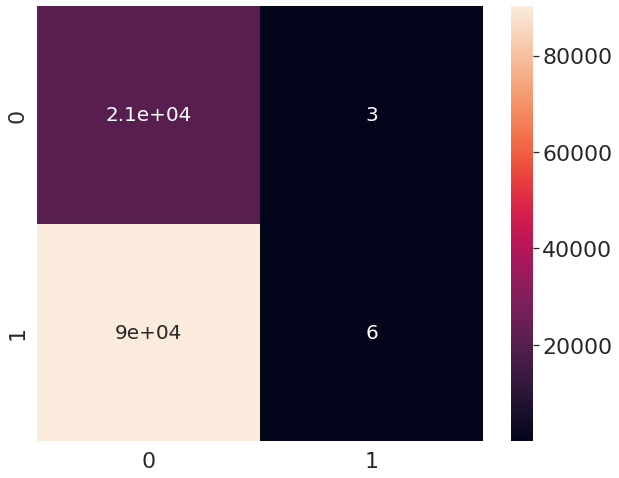

AUC score:  0.49996063222468734


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


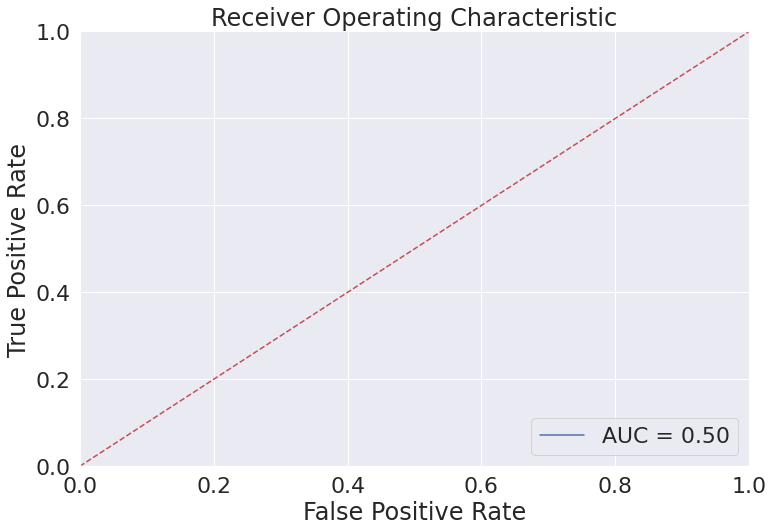

In [43]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [44]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.242     1.000     0.389     29555
           1      0.000     0.000     0.000     92712

    accuracy                          0.242    122267
   macro avg      0.121     0.500     0.195    122267
weighted avg      0.058     0.242     0.094    122267



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


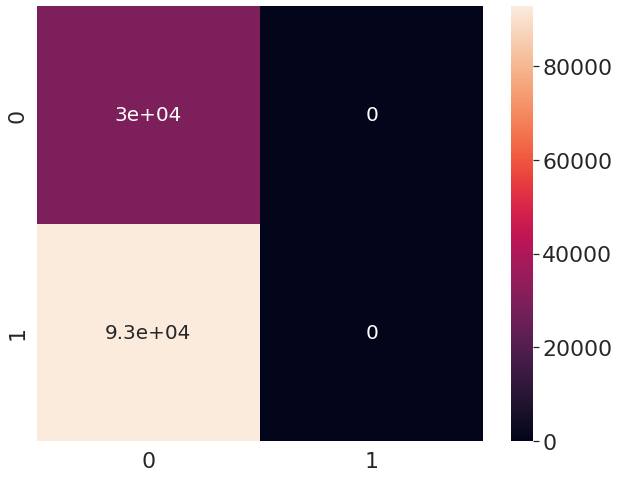

In [45]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 4]
              precision    recall  f1-score   support

           0      0.187     1.000     0.314     20653
           1      1.000     0.001     0.003     90196

    accuracy                          0.187    110849
   macro avg      0.593     0.501     0.159    110849
weighted avg      0.848     0.187     0.061    110849



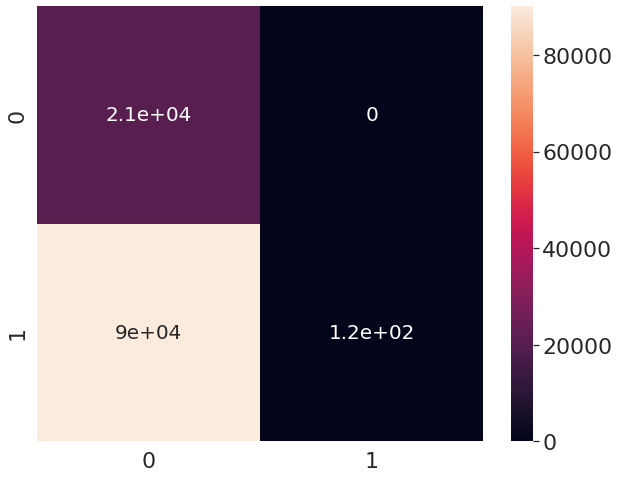

AUC score:  0.5006707614528361


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


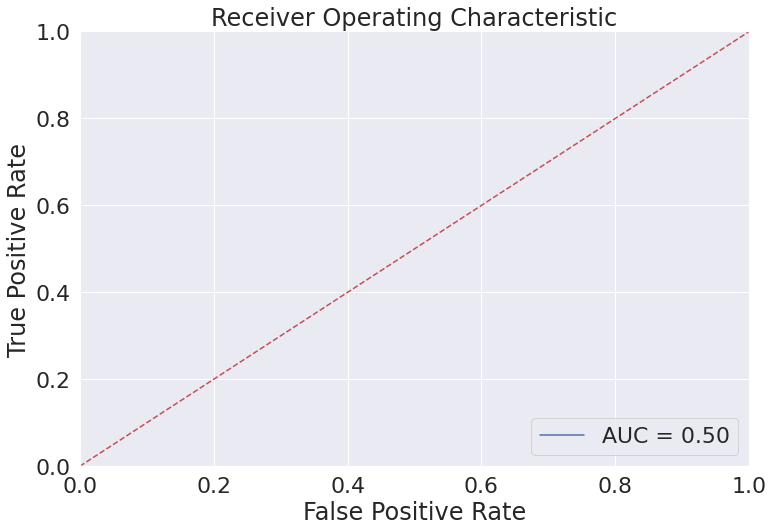

In [46]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [47]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.242     1.000     0.389     29555
           1      0.000     0.000     0.000     92712

    accuracy                          0.242    122267
   macro avg      0.121     0.500     0.195    122267
weighted avg      0.058     0.242     0.094    122267



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


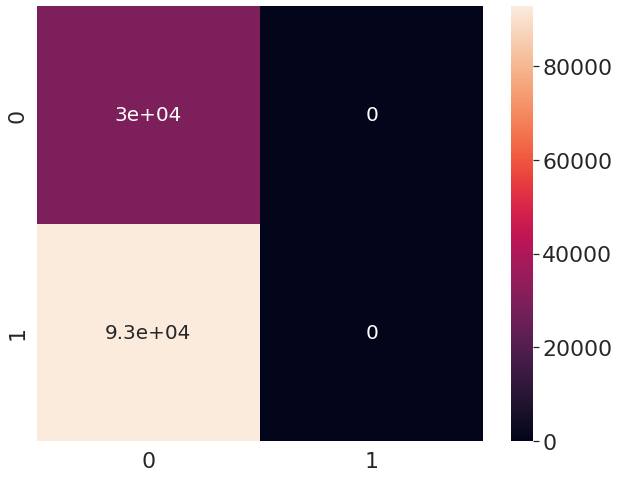

In [48]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.186     1.000     0.314     20653
           1      0.000     0.000     0.000     90196

    accuracy                          0.186    110849
   macro avg      0.093     0.500     0.157    110849
weighted avg      0.035     0.186     0.059    110849



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


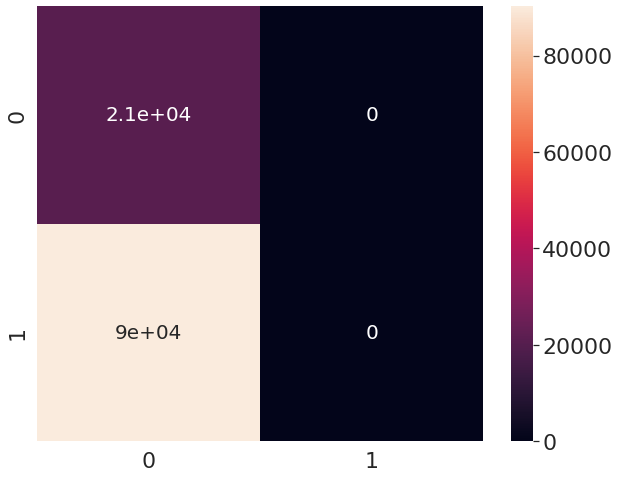

In [49]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [50]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.242     1.000     0.389     29555
           1      0.000     0.000     0.000     92712

    accuracy                          0.242    122267
   macro avg      0.121     0.500     0.195    122267
weighted avg      0.058     0.242     0.094    122267



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


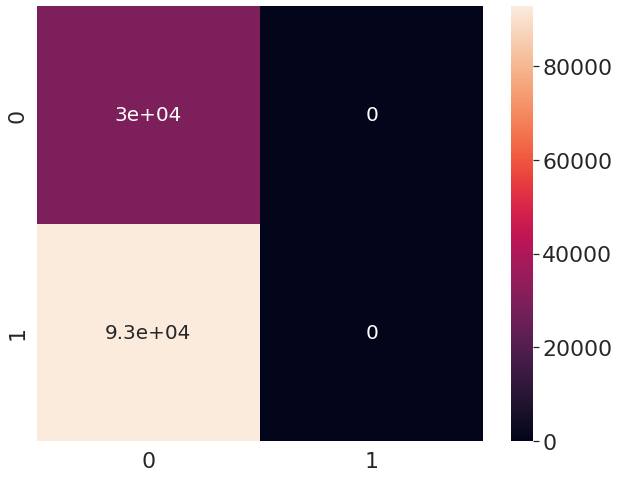

In [51]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.186     1.000     0.314     20653
           1      0.000     0.000     0.000     90196

    accuracy                          0.186    110849
   macro avg      0.093     0.500     0.157    110849
weighted avg      0.035     0.186     0.059    110849



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


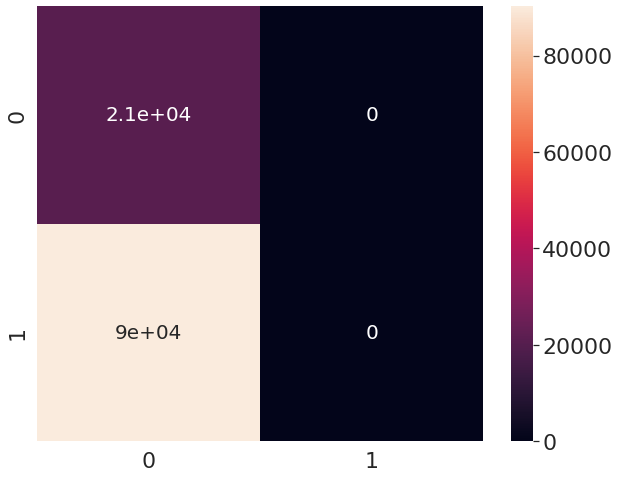

In [52]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [53]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.952     1.000     0.975     29555
           1      1.000     0.984     0.992     92712

    accuracy                          0.988    122267
   macro avg      0.976     0.992     0.983    122267
weighted avg      0.988     0.988     0.988    122267



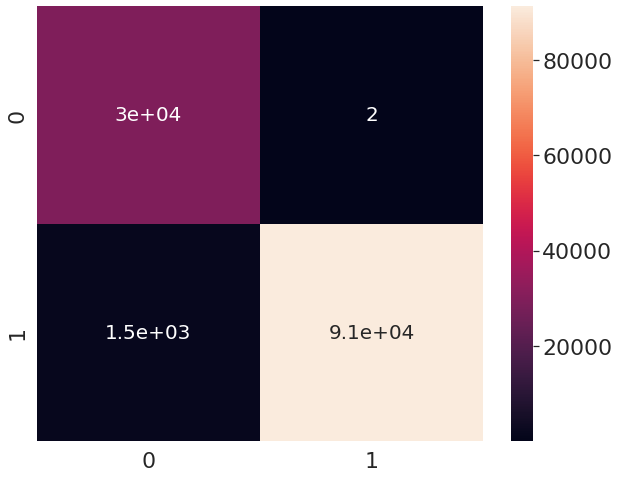

AUC score:  9.91855024903515e-01


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


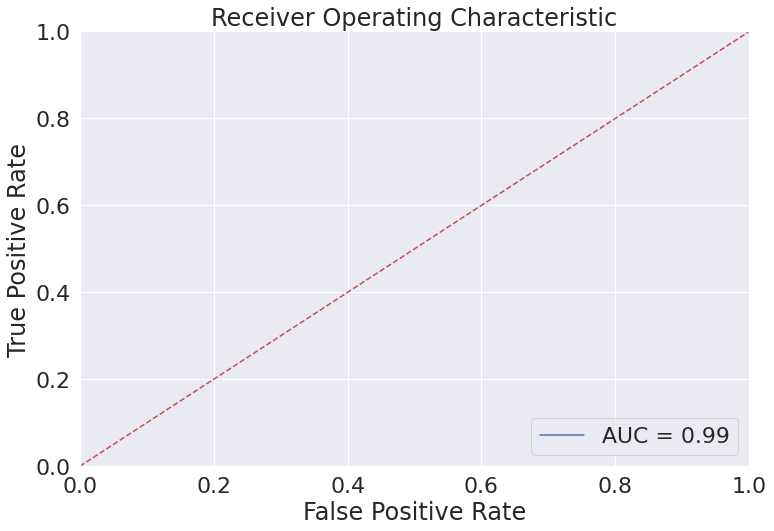

In [54]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.626     1.000     0.770     20653
           1      1.000     0.863     0.927     90196

    accuracy                          0.889    110849
   macro avg      0.813     0.932     0.848    110849
weighted avg      0.930     0.889     0.898    110849



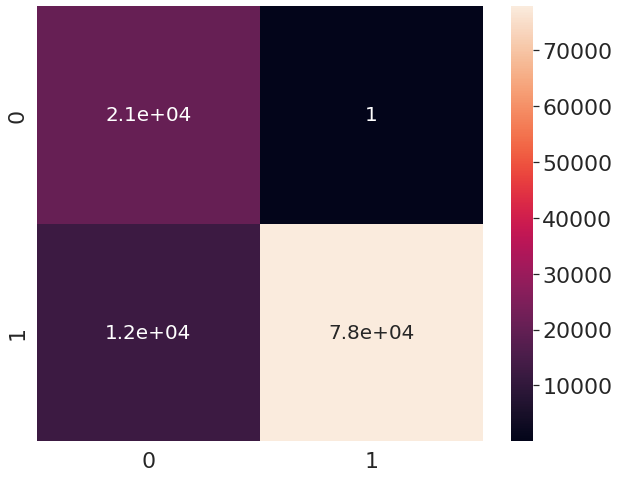

AUC score:  0.9316800788805781


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


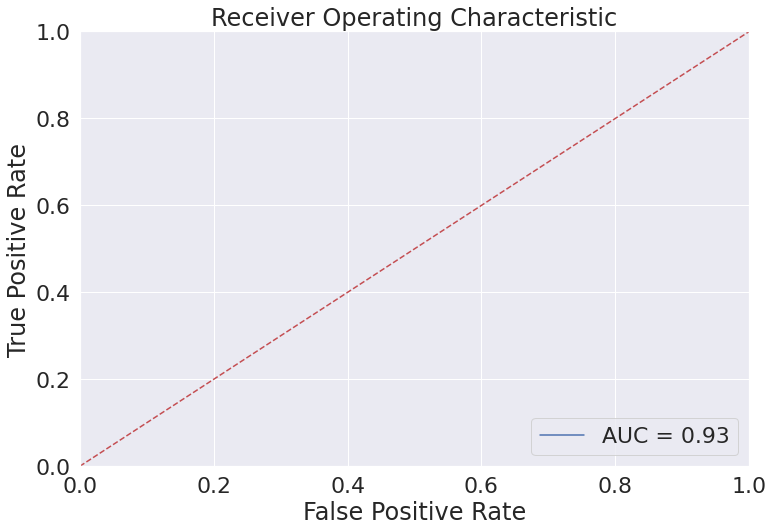

In [55]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [56]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

y_pred unique:  [0 2 4]
              precision    recall  f1-score   support

           0      0.326     1.000     0.491     29555
           1      1.000     0.340     0.507     92712

    accuracy                          0.499    122267
   macro avg      0.663     0.670     0.499    122267
weighted avg      0.837     0.499     0.503    122267



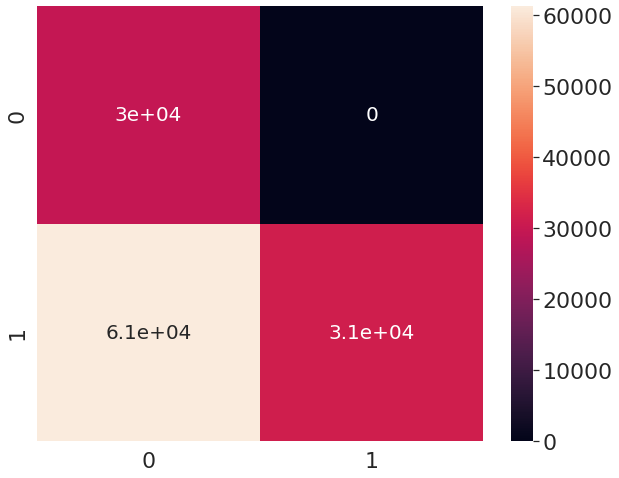

AUC score:  0.6697568815255845


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


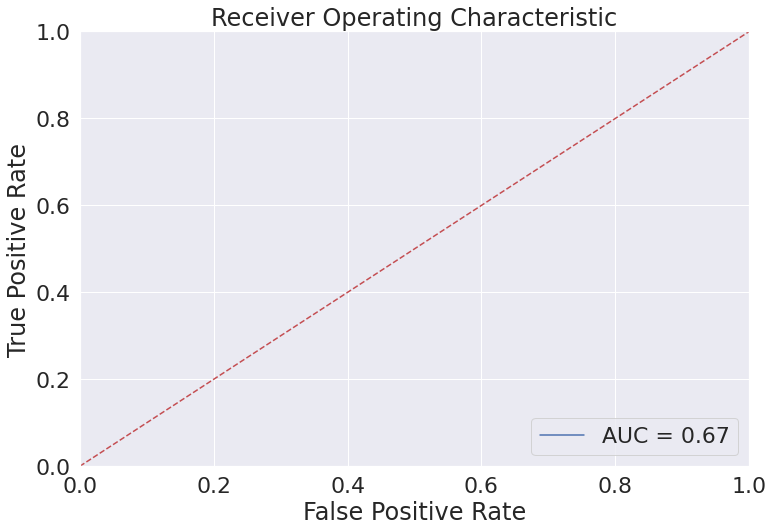

In [57]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     1.000     20653
           1      1.000     1.000     1.000     90196

    accuracy                          1.000    110849
   macro avg      1.000     1.000     1.000    110849
weighted avg      1.000     1.000     1.000    110849



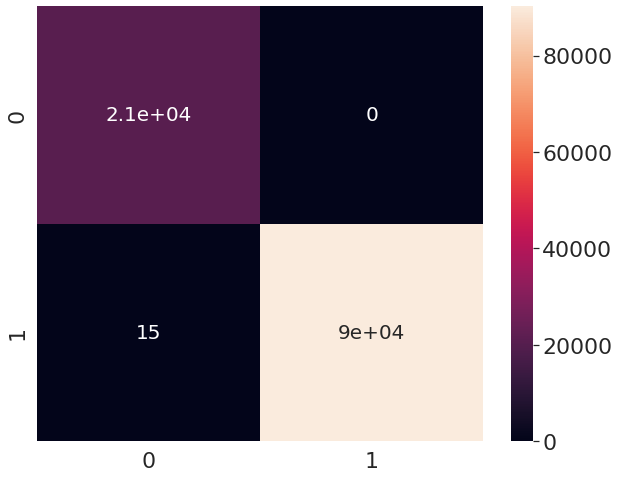

AUC score:  0.9999168477537806


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


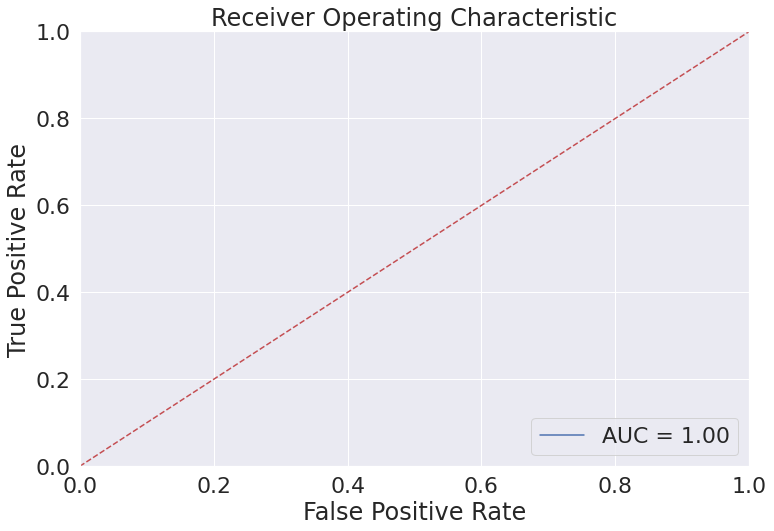

In [58]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [59]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     29555
           1      1.000     1.000     1.000     92712

    accuracy                          1.000    122267
   macro avg      1.000     1.000     1.000    122267
weighted avg      1.000     1.000     1.000    122267



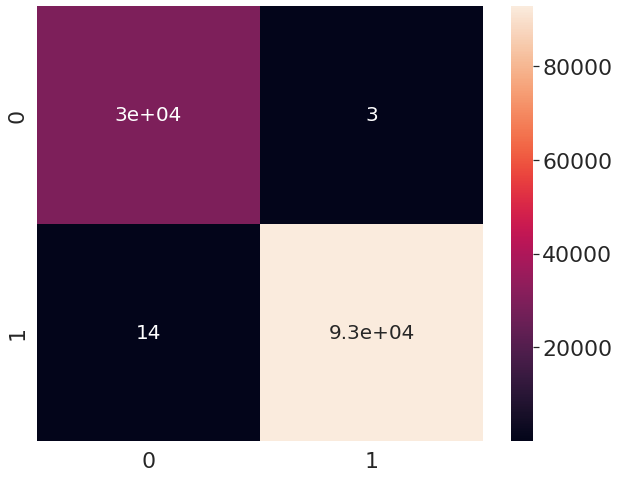

AUC score:  0.9998737445344942


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


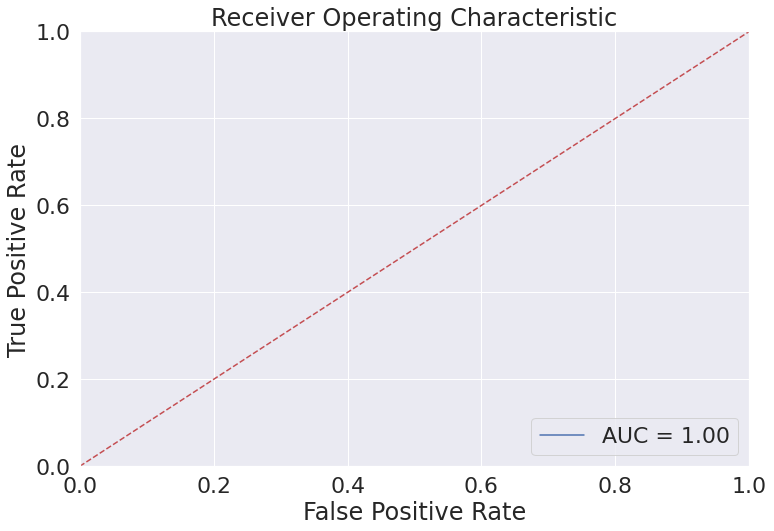

In [60]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.692     1.000     0.818     20653
           1      1.000     0.898     0.946     90196

    accuracy                          0.917    110849
   macro avg      0.846     0.949     0.882    110849
weighted avg      0.943     0.917     0.922    110849



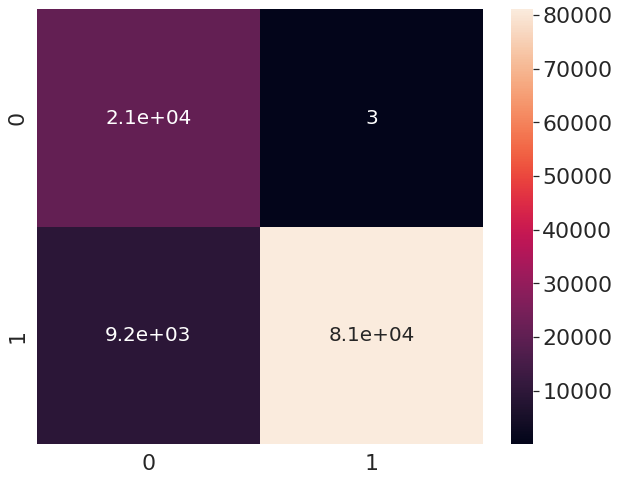

AUC score:  0.9490104792245543


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


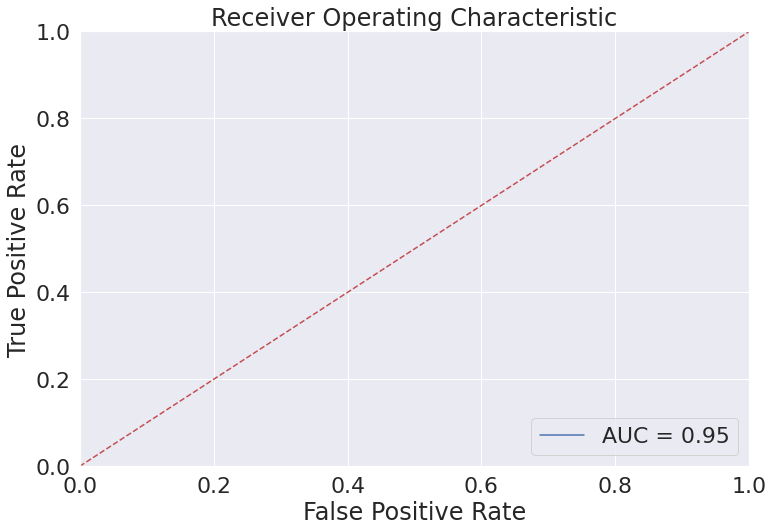

In [61]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [62]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

y_pred unique:  [0 3 4]
              precision    recall  f1-score   support

           0      0.338     1.000     0.505     29555
           1      1.000     0.375     0.545     92712

    accuracy                          0.526    122267
   macro avg      0.669     0.687     0.525    122267
weighted avg      0.840     0.526     0.535    122267



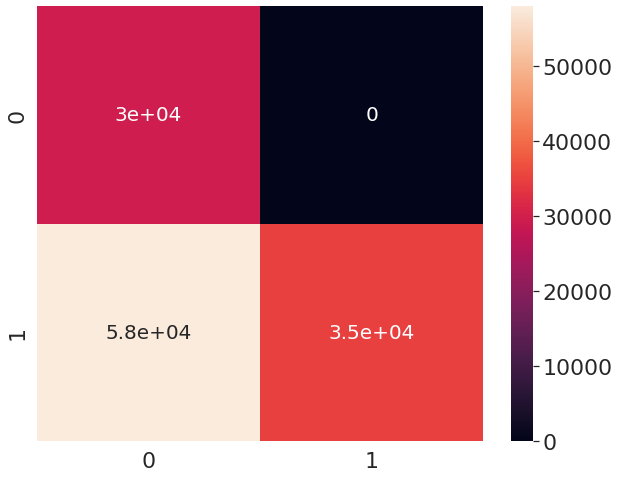

AUC score:  0.687322029510743


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


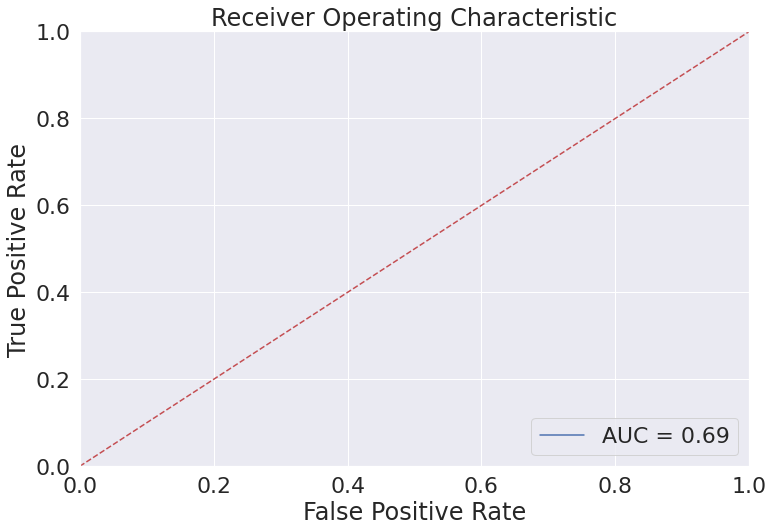

In [63]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20653
           1      1.000     1.000     1.000     90196

    accuracy                          1.000    110849
   macro avg      1.000     1.000     1.000    110849
weighted avg      1.000     1.000     1.000    110849



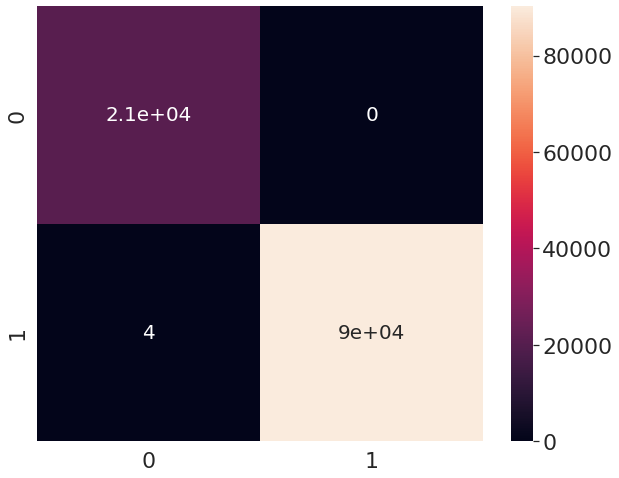

AUC score:  0.9999778260676748


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


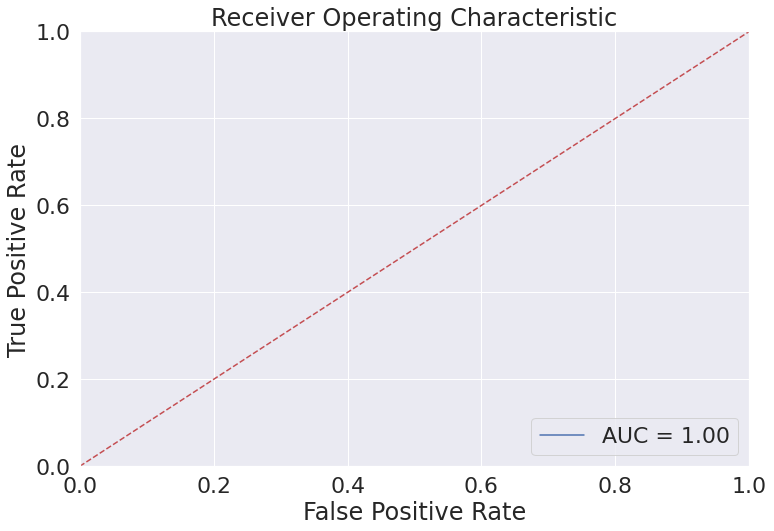

In [64]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [65]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     1.000     29555
           1      1.000     1.000     1.000     92712

    accuracy                          1.000    122267
   macro avg      1.000     1.000     1.000    122267
weighted avg      1.000     1.000     1.000    122267



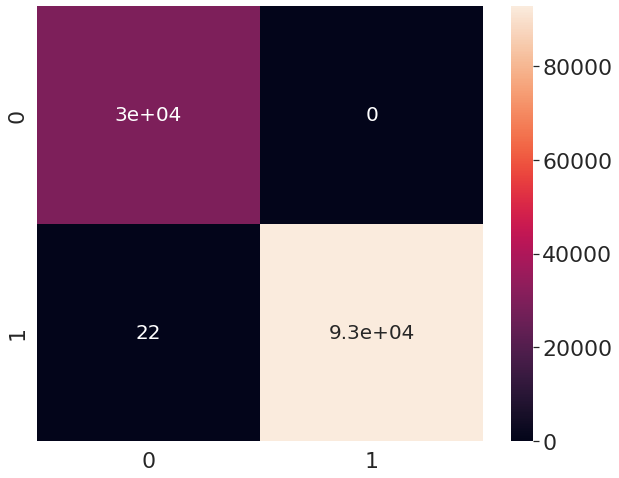

AUC score:  0.999881353007162


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


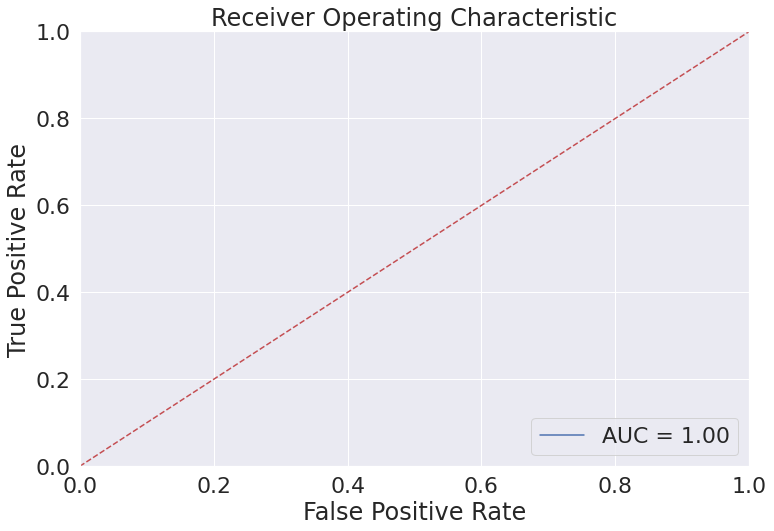

In [66]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.988     1.000     0.994     20653
           1      1.000     0.997     0.999     90196

    accuracy                          0.998    110849
   macro avg      0.994     0.999     0.996    110849
weighted avg      0.998     0.998     0.998    110849



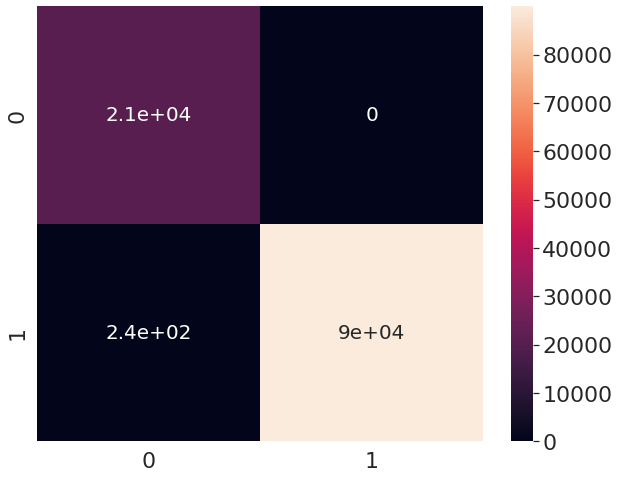

AUC score:  0.9986640205774092


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


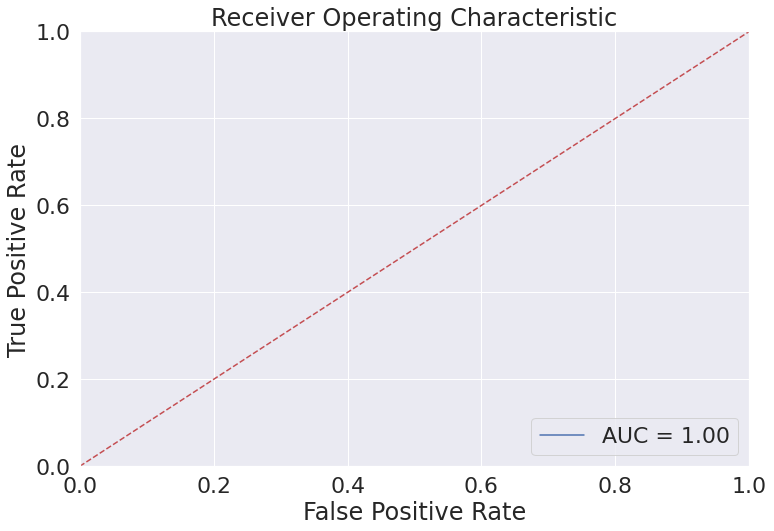

In [67]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [68]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

y_pred unique:  [0 1 4 5]
              precision    recall  f1-score   support

           0      0.331     1.000     0.498     29555
           1      1.000     0.356     0.525     92712

    accuracy                          0.512    122267
   macro avg      0.666     0.678     0.511    122267
weighted avg      0.838     0.512     0.518    122267



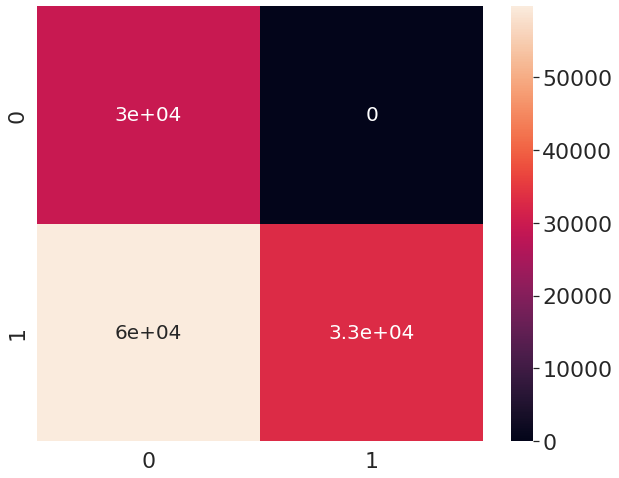

AUC score:  0.6780244197083442


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


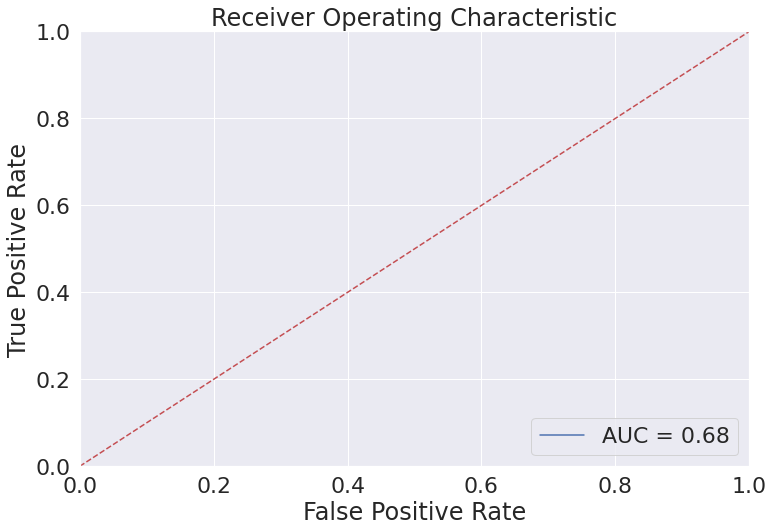

In [69]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20653
           1      1.000     1.000     1.000     90196

    accuracy                          1.000    110849
   macro avg      1.000     1.000     1.000    110849
weighted avg      1.000     1.000     1.000    110849



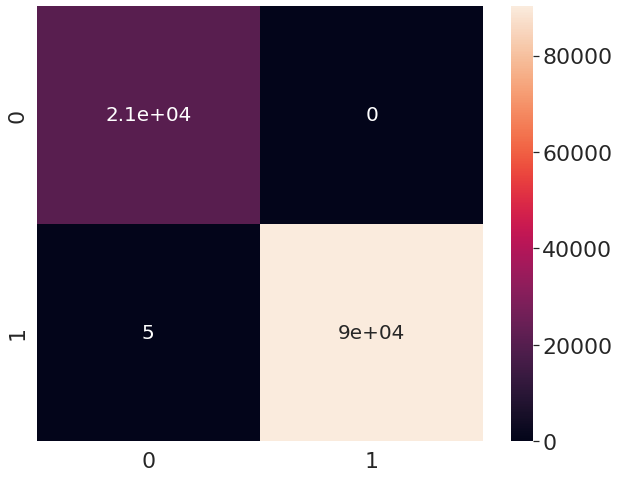

AUC score:  0.9999722825845936


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


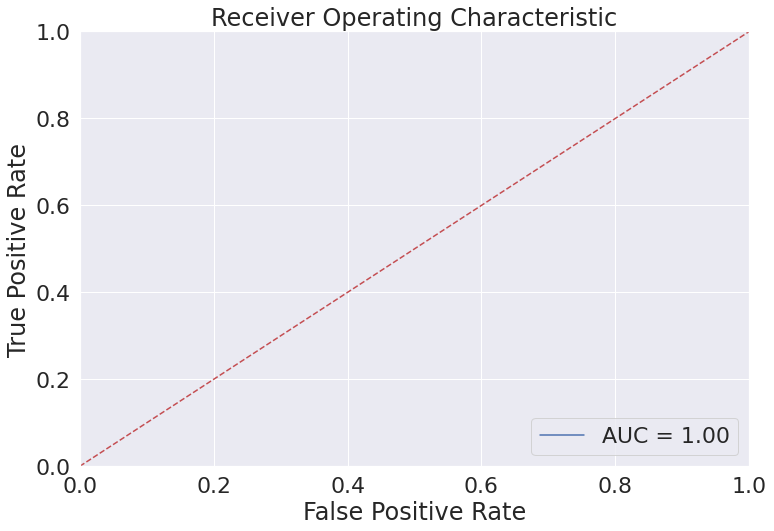

In [70]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)